<a href="https://colab.research.google.com/github/SScliff/Projeto_DataScience_alura/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja4.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


#1. Análise do faturamento


## Análise de Faturamento por Loja

Nesta análise, calculamos o faturamento total de quatro lojas com base nos dados de vendas registrados em seus respectivos DataFrames. O objetivo principal foi comparar os desempenhos de cada loja e exibir o ranking em um gráfico de barras.

### 🧮 Cálculo do Faturamento

Para cada loja, utilizamos a coluna `Preço` do DataFrame correspondente e aplicamos o método `.sum()` para obter o valor total de vendas:


In [81]:
faturamento_loja1 = loja1["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()



O faturamento das 4 lojas respectivamente é R$1534509.12, R$1488459.06, R$1464025.03 e R$1384497.58


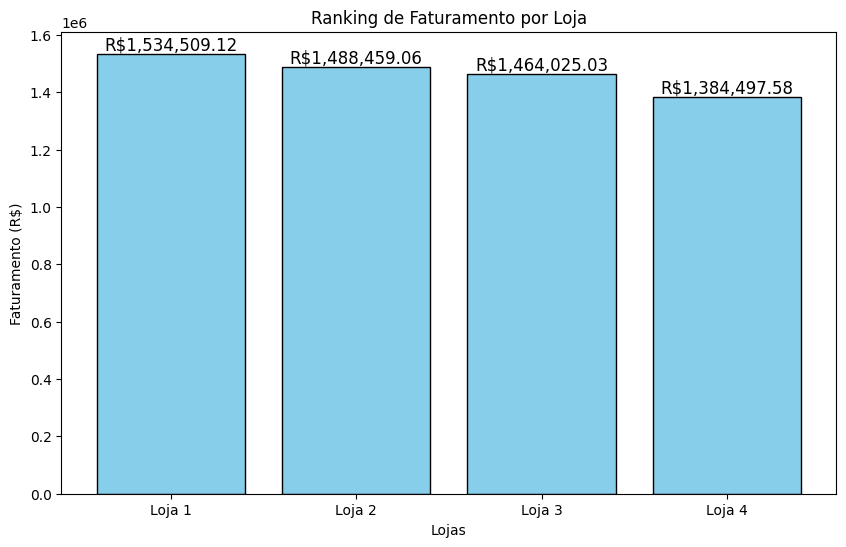

In [82]:
dados_faturamento = {
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]}

df_faturamento = pd.DataFrame(dados_faturamento)
df_faturamento = df_faturamento.sort_values(by='Faturamento', ascending=False)

print(f'O faturamento das 4 lojas respectivamente é R${faturamento_loja1}, R${faturamento_loja2}, R${faturamento_loja3} e R${faturamento_loja4}')


plt.figure(figsize=(10, 6))
bars = plt.bar(df_faturamento['Loja'], df_faturamento['Faturamento'], color='skyblue', edgecolor = 'black')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1000,
             f'R${bar.get_height():,.2f}',
             ha='center', va='bottom', fontsize=12)

plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.title('Ranking de Faturamento por Loja')
plt.show()

# 2. Vendas por Categoria


In [91]:
categorias_loja1 = loja1["Categoria do Produto"].unique()
categorias_loja2 = loja2["Categoria do Produto"].unique()
categorias_loja3 = loja3["Categoria do Produto"].unique()
categorias_loja4 = loja4["Categoria do Produto"].unique()

todas_categorias = set(categorias_loja1) | set(categorias_loja2) | set(categorias_loja3) | set(categorias_loja4)

todas_categorias = sorted(list(todas_categorias))


dados_categorias = []

for categoria in todas_categorias:
    soma = int(round(loja[loja['Categoria do Produto'] == categoria]['Preço'].sum(), 2))
    dados_categorias.append({'Categoria': categoria, 'Faturamento': soma})

print(dados_categorias)




[{'Categoria': 'brinquedos', 'Faturamento': 23993}, {'Categoria': 'eletrodomesticos', 'Faturamento': 484913}, {'Categoria': 'eletronicos', 'Faturamento': 572659}, {'Categoria': 'esporte e lazer', 'Faturamento': 52387}, {'Categoria': 'instrumentos musicais', 'Faturamento': 121731}, {'Categoria': 'livros', 'Faturamento': 11713}, {'Categoria': 'moveis', 'Faturamento': 250178}, {'Categoria': 'utilidades domesticas', 'Faturamento': 16931}]


<ipython-input-115-af4c70c8256e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(data=dados_categorias, x='Categoria', y='Faturamento', palette='Blues_r')


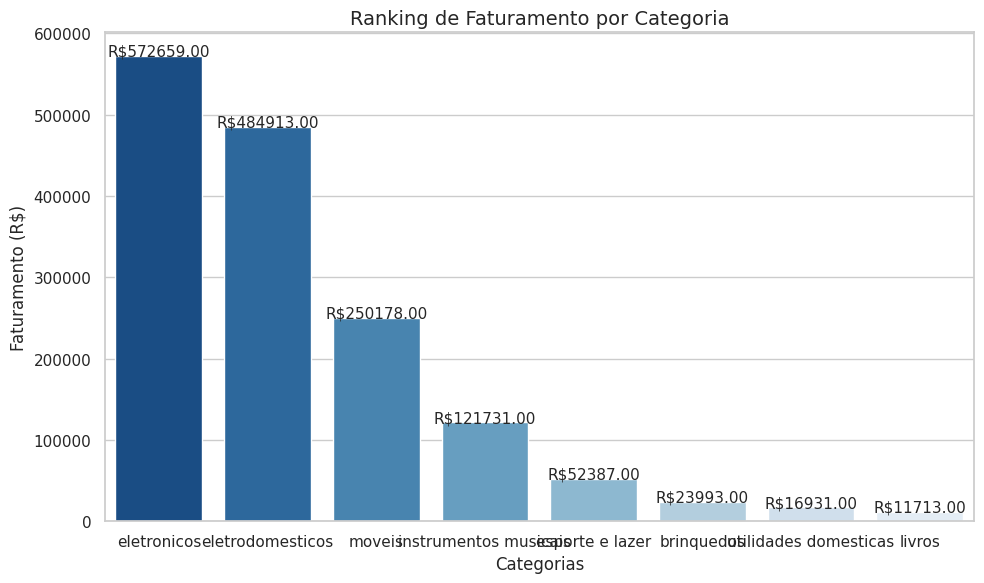

In [115]:
dados_categorias = pd.DataFrame(dados_categorias)
dados_categorias = dados_categorias.sort_values(by='Faturamento', ascending=False)

# Estilo do gráfico
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
grafico = sns.barplot(data=dados_categorias, x='Categoria', y='Faturamento', palette='Blues_r')

# Adiciona os valores nas barras
for i, bar in enumerate(grafico.patches):
    valor = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             valor + 0.5,
             f'R${valor:.2f}',
             ha='center', fontsize=11)

# Títulos e rótulos
plt.title('Ranking de Faturamento por Categoria', fontsize=14)
plt.xlabel('Categorias')
plt.ylabel('Faturamento (R$)')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja


In [101]:
lojas = [loja1, loja2, loja3, loja4]
def soma_frete(loja):
  frete = int(round(loja['Frete'].mean(), 2))
  return frete

fretes = [soma_frete(i) for i in lojas]
print(fretes)

[34, 33, 33, 31]


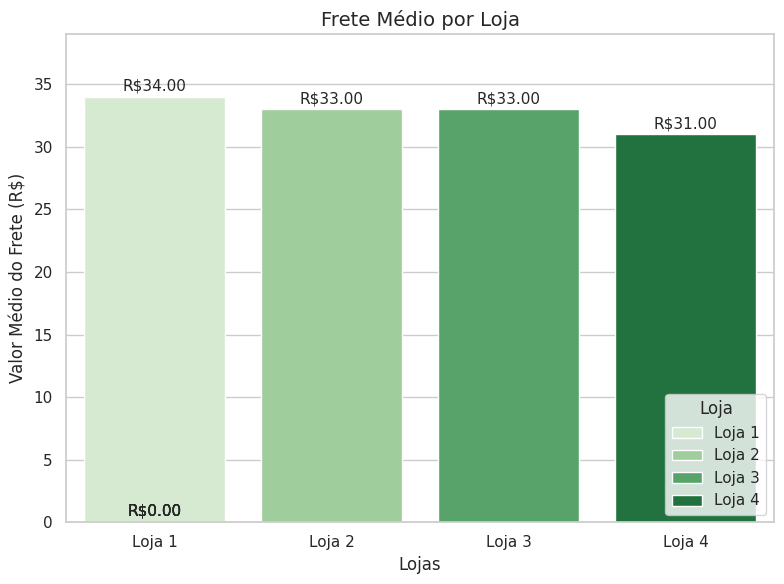

In [113]:
lojas_nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
fretes = [34, 33, 33, 31]

# Criando DataFrame
df_fretes = pd.DataFrame({
    'Loja': lojas_nomes,
    'Frete Médio': fretes
})

# Estilo
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 6))
grafico = sns.barplot(
    data=df_fretes,
    x='Loja',
    y='Frete Médio',
    hue='Loja',
    palette='Greens',
    dodge=False,
    legend=True
)


# Adiciona os valores nas barras
for i, bar in enumerate(grafico.patches):
    valor = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             valor + 0.5,
             f'R${valor:.2f}',
             ha='center', fontsize=11)

plt.title('Frete Médio por Loja', fontsize=14)
plt.ylabel('Valor Médio do Frete (R$)')
plt.xlabel('Lojas')
plt.ylim(0, max(fretes) + 5)

plt.tight_layout()
plt.show()
